# Libs

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [5]:
df = pd.read_excel(r'C:\Users\feh_s\DSA_powerBI\DSA_powerBI\cap_18\data\Producao-2018-2023.xlsx', sheet_name='Producao')
df.head()

,Período,Turno,Range Idade Funcionários,Total Unidades Produzidas
0,2018-01-01,Manhã,16 a 19 anos,198987
1,2018-01-01,Manhã,20 a 24 anos,479800
2,2018-01-01,Manhã,25 a 34 anos,687123
3,2018-01-01,Manhã,35 a 44 anos,550902
4,2018-01-01,Manhã,45 a 54 anos,562791


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    868 non-null    datetime64[ns]
 1   Turno                      868 non-null    object        
 2   Range Idade Funcionários   868 non-null    object        
 3   Total Unidades Produzidas  868 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 27.3+ KB


# Análise exploratória

In [18]:
x

Range Idade Funcionários
16 a 19 anos       0.142857
20 a 24 anos       0.142857
25 a 34 anos       0.142857
35 a 44 anos       0.142857
45 a 54 anos       0.142857
55 a 64 anos       0.142857
65 anos e acima    0.142857
Name: proportion, dtype: float64

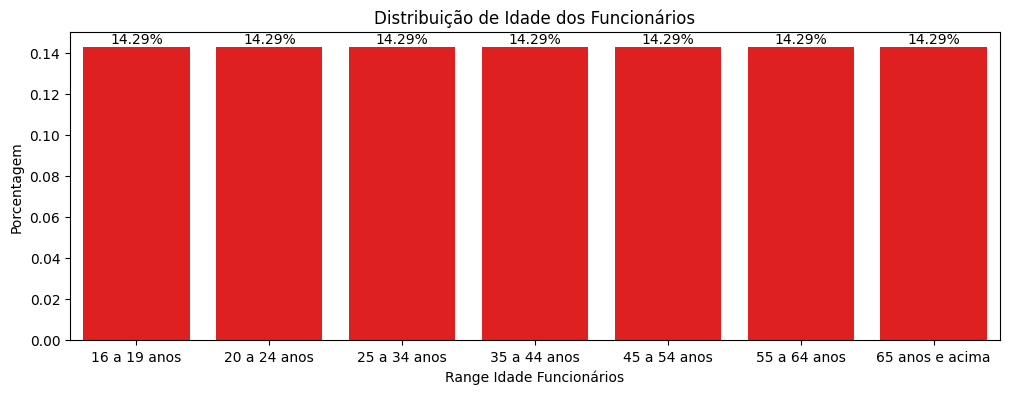

In [59]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 4))
x = df['Range Idade Funcionários'].value_counts(normalize=True)

# Plot do histograma
ax = sns.barplot(x=x.index, y=x.values, color='red')

# Adicionando rótulos no topo das barras
for i, v in enumerate(x.values):
    ax.text(i, v, f"{v*100:.2f}%", ha='center', va='bottom')

# Configurações do gráfico
plt.xlabel('Range Idade Funcionários')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Idade dos Funcionários')

# Exibindo o gráfico
plt.show()


# SK Time